In [27]:
import utils
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import resnet
import imp

In [13]:
print("Num GPUs Available: ", utils.get_num_gpus())

Num GPUs Available:  1


In [35]:
train_images, test_images, train_labels, test_labels = resnet.load_data()

### Learning rate schedule

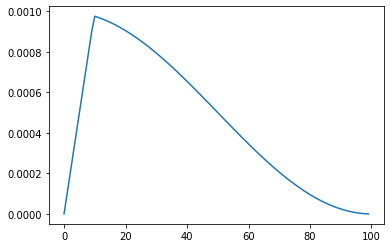

In [18]:
plt.plot([utils.lr_schedule(cur_it=i, max_it=100, max_warm_it=10) for i in range(100)])

In [ ]:
all_loss = {}
all_acc_te = {}
all_acc_tr = {}
for res in [True, False]:
    for n in reversed([3, 5, 7, 9]):
        print("╭┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈╮")
        print(f"                         n: {n}, res: {res}")
        if res:
            name = f"res{n}"
        else:
            name = f"plain{n}"
            
        g = tf.Graph()
        with g.as_default():
            nodes = create_graph(name, n=n, residual=res)

        with tf.Session(graph = g) as sess:
            sess.run(tf.global_variables_initializer())
            loss, acc_te, acc_tr = train(sess, nodes, n_epochs=200)
        print("╰┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈┈╯")

        all_loss[name] = loss
        all_acc_te[name] = acc_te
        all_acc_tr[name] = acc_tr

### "Plain" convnets
As expected, as we increase the size of the neural net, training loss increases

/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


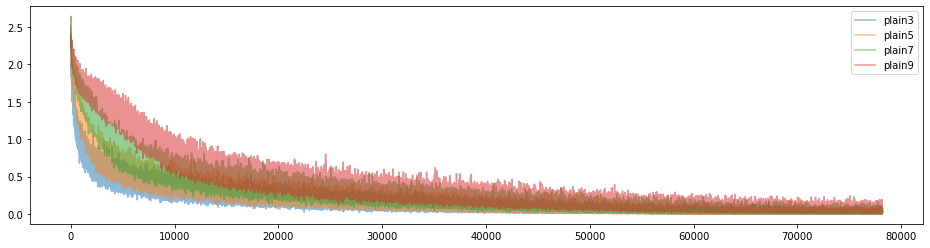

In [74]:
fig=plt.figure(figsize=(16, 4))
plt.plot(all_loss['plain3'], alpha=.5)
plt.plot(all_loss['plain5'], alpha=.5)
plt.plot(all_loss['plain7'], alpha=.5)
plt.plot(all_loss['plain9'], alpha=.5)
plt.legend([f'plain{i}' for i in [3, 5, 7, 9]])

### residual networks
It's harder to see here, but larger neural nets train better, which is the opposite of the "plain" networks.

/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/events.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/thecroc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


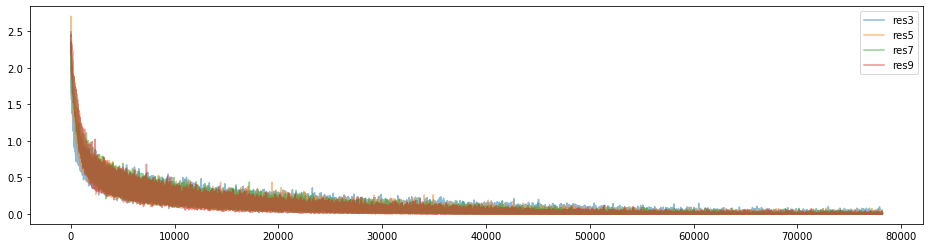

In [75]:
fig=plt.figure(figsize=(16, 4))
plt.plot(all_loss['res3'], alpha=.5)
plt.plot(all_loss['res5'], alpha=.5)
plt.plot(all_loss['res7'], alpha=.5)
plt.plot(all_loss['res9'], alpha=.5)
plt.legend([f'res{i}' for i in [3, 5, 7, 9]])

### Reproduction of He et al 2015, Fig 6

[0.0, 39.0625, 78.125, 117.1875, 156.25, 195.3125]

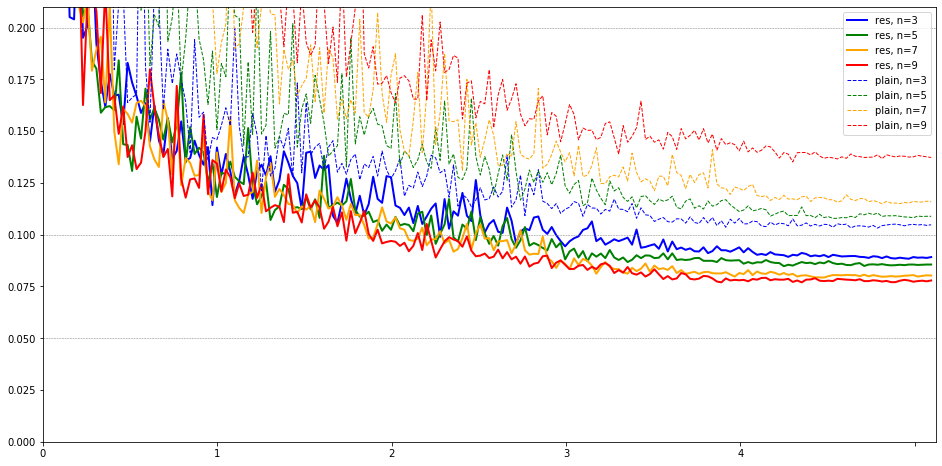

In [76]:
fig=plt.figure(figsize=(16, 8))
plt.plot(1 - np.array(all_acc_te['res3']), lineWidth=2, color='blue')
plt.plot(1 - np.array(all_acc_te['res5']), lineWidth=2, color='green')
plt.plot(1 - np.array(all_acc_te['res7']), lineWidth=2, color='orange')
plt.plot(1 - np.array(all_acc_te['res9']), lineWidth=2, color='red')

plt.plot(1 - np.array(all_acc_te['plain3']), '--', lineWidth=1, color='blue')
plt.plot(1 - np.array(all_acc_te['plain5']), '--', lineWidth=1, color='green')
plt.plot(1 - np.array(all_acc_te['plain7']), '--', lineWidth=1, color='orange')
plt.plot(1 - np.array(all_acc_te['plain9']), '--', lineWidth=1, color='red')

plt.legend([f'{ty}, n={i}' for ty in ['res', 'plain'] for i in [3, 5, 7, 9]])
xlim = plt.xlim([0, len(all_acc_tr['res9'])])
plt.plot(xlim, [0.2, 0.2], '--', lineWidth=.5, color='gray')
plt.plot(xlim, [0.1, 0.1], '--', lineWidth=.5, color='gray')
plt.plot(xlim, [0.05, 0.05], '--', lineWidth=.5, color='gray')
plt.ylim([0, .21])
locs = [x * 50000 / 128 / 10000 for x in range(0, 6000, 1000)]
labels = range(5)
plt.xticks(locs, labels)
locs